# <center>Machine Learning Project Code</center>

<a class="anchor" id="top"></a>

## <center>*02 - Holdout Method*</center>

** **



# Table of Contents  <br>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
    
2. [Train-Test Split](#2.-Train-Test-Split)

   2.1 [Feature Engineering](#2.1-Feature-Engineering) <br>
    
   2.2 [Missing Values](#2.2-Missing-Values) <br>
    
   2.3 [Outliers](#2.3-Outliers) <br>
   
   2.4 [Scaling](#2.4-Scaling) <br><br>
   
3. [Feature Selection](#3.-Feature-Selection) 
    
    3.1 [Filter Based Methods](#3.1-Filter-Based-Methods) <br>

    3.2 [Wrapper Methods](#3.2-Wrapper-Methods) <br>
    
    3.3 [Embedded Methods](#3.3-Embedded-Methods) <br><br>
    
4. [Modeling](#4.-Modeling) <br><br>

5. [Export](#5.-Export)


** **

In this notebook we will start by spliting train and validation data using a simple Holdout Method. After doing so, more complex methods to fill missing values will be applied, and outliers will be addresses. Feature Selection will also be performed, followed by a Modeling section.

Data Scientist Manager: António Oliveira, **20211595**

Data Scientist Senior: Tomás Ribeiro, **20240526**

Data Scientist Junior: Gonçalo Pacheco, **20240695**

Data Analyst Senior: Gonçalo Custódio, **20211643**

Data Analyst Junior: Ana Caleiro, **20240696**


** ** 

# 1. Importing Libraries & Data
In this section, we set up the foundation for our project by importing the necessary Python libraries and loading the dataset. These libraries provide the tools for data manipulation, visualization, and machine learning modeling throughout the notebook. Additionally, we import the historical claims dataset, which forms the core of our analysis. 

In [114]:
import pandas as pd

# Train-Test Split
from sklearn.model_selection import train_test_split
import preproc as p

# Feature Selection
import feature_selection as fs

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, \
    GradientBoostingClassifier, AdaBoostClassifier, \
    StackingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  
from sklearn.neural_network import MLPClassifier

# Metrics
import metrics as m

pd.set_option('display.max_columns', None)
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [36]:
# Load training data
df2 = pd.read_csv('./data/train_data_EDA.csv', index_col = 'Claim Identifier')

# Load testing data
test = pd.read_csv('./data/test_data_EDA.csv', index_col = 'Claim Identifier')

# Display the first 3 rows of the training data
df2.head(3)

,Age at Injury,Attorney/Representative,Average Weekly Wage,Birth Year,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Gender Enc,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Day of Week,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Day of Week,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Day of Week,WCIO Codes,Wage to Age Ratio,Insurance,Zip Code Valid,Industry Sector,Age Group,Alternative Dispute Resolution Bin
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,31.0,N,0.00,1988.0,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,1,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,27,10,62,1.0,0,2019.0,12.0,30.0,0.0,2020,1,1,2,2019.0,12.0,31.0,1.0,271062,0.000000,1,0,Retail and Wholesale,1,0
5393091,46.0,Y,1745.93,1973.0,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,3,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97,49,38,4.0,1,2019.0,8.0,30.0,4.0,2020,1,1,2,2020.0,1.0,1.0,2.0,974938,37.147447,1,0,Manufacturing and Construction,1,0
5393889,40.0,N,1434.80,1979.0,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,3,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79,7,10,6.0,0,2019.0,12.0,6.0,4.0,2020,1,1,2,2020.0,1.0,1.0,2.0,79710,34.995122,1,0,Business Services,1,0


In [96]:
df = df2.copy()

# 2. Train-Test Split
The train-test split is a crucial technique used to assess model performance by dividing the dataset into training and testing subsets. This ensures that the model is evaluated on unseen data, helping to prevent overfitting and providing an unbiased performance estimate. 

<a href="#top">Top &#129033;</a>

**Holdout Method**

In [97]:
# Split the DataFrame into features (X) and target variable (y)
X = df.drop('Claim Injury Type', axis=1) 
y = df['Claim Injury Type']  

In [98]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify = y) 


## 2.1 Feature Engineering

<a href="#top">Top &#129033;</a>

### 2.1.1 Encoding

Encoding transforms categorical data into numerical format for use in machine learning models. For this section, several encoders were considered:
- **One Hot Encoding** -  turns a variable that is stored in a column into dummy variables stored over multiple columns and represented as 0s and 1s
- **Frequency Encoding** - replaces the categories by with their proportion in the dataset
- **Count Encoding** - replaces the categories by the number of times they appear in the dataset 
- **Manual Mapping Encoding** - manually attribute values to each category

In [99]:
from sklearn.preprocessing import OneHotEncoder
def encode(train, val, test, column, type_):
    
    if type_ == 'count':
        new_column = column + ' Enc'  

        # Count encoding based on training data
        freq = train[column].value_counts()
        train[new_column] = train[column].map(freq).astype(int)
        val[new_column] = val[column].map(freq).astype(int)
        test[new_column] = test[column].map(freq).astype(int)
        
    elif type_ == 'OHE':
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        
        # Fit on the training data and transform all datasets
        train_encoded = encoder.fit_transform(train[[column]])
        val_encoded = encoder.transform(val[[column]])
        test_encoded = encoder.transform(test[[column]])
        
        # Get new column names
        ohe_columns = [f"{column}_{category}" for category in encoder.categories_[0]]

        # Convert encoded arrays to DataFrames, drop the first column and convert to integers in one step
        train_ohe = pd.DataFrame(train_encoded, columns=ohe_columns, index=train.index).iloc[:, 1:].astype(int)
        val_ohe = pd.DataFrame(val_encoded, columns=ohe_columns, index=val.index).iloc[:, 1:].astype(int)
        test_ohe = pd.DataFrame(test_encoded, columns=ohe_columns, index=test.index).iloc[:, 1:].astype(int)

        
        # Append the encoded columns back to the original DataFrames
        train = pd.concat([train, train_ohe], axis=1)
        val = pd.concat([val, val_ohe], axis=1)
        test = pd.concat([test, test_ohe], axis=1)
        
    return train, val, test

**Alternative Dispute Resolution**

Knowing that 'N' is by far the most common category, and that 'U' only appears 5 times in DF data and 1 time in the test data, we decided to join 'U' and 'Y' into 'Y/U', and encode the variable as:
- 0 - N
- 1 - Y/U

In [35]:
print(X_train['Alternative Dispute Resolution'].value_counts())
print(' ')
print(test['Alternative Dispute Resolution'].value_counts())

Alternative Dispute Resolution
N    571411
Y      2609
U         5
Name: count, dtype: int64
 
Alternative Dispute Resolution
N    386314
Y      1660
U         1
Name: count, dtype: int64


In [36]:
X_train['Alternative Dispute Resolution Bin'] = X_train['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1, 'U': 1})
X_val['Alternative Dispute Resolution Bin'] = X_val['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1, 'U': 1})
test['Alternative Dispute Resolution Bin'] = test['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1, 'U': 1})

**Attorney/Representative**

As this variable only has 2 categories, they will be encoded as follows:
- N - 0
- Y - 1

In [100]:
print(X_train['Attorney/Representative'].value_counts())
print(' ')
print(test['Attorney/Representative'].value_counts())

Attorney/Representative
N    392291
Y    181734
Name: count, dtype: int64
 
Attorney/Representative
N    306476
Y     81499
Name: count, dtype: int64


In [101]:
X_train['Attorney/Representative Bin'] = X_train['Attorney/Representative'].replace({'N': 0, 'Y': 1})
X_val['Attorney/Representative Bin'] = X_val['Attorney/Representative'].replace({'N': 0, 'Y': 1})
test['Attorney/Representative Bin'] = test['Attorney/Representative'].replace({'N': 0, 'Y': 1})

**Carrier Name**

As Carrier name has a considerable amount of unique values, it will be encoded using Count Encoder.

**Carrier Type**

After grouping the *5.* categories we decided to encode them in 2 distinct ways, and choose the best option in feature selection.

Starting with *Count Encoding*

In [102]:
X_train, X_val, test = encode(X_train, X_val, test, 'Carrier Type', 'count')

And *One-Hot-Encoding*

In [103]:
X_train, X_val, test = encode(X_train, X_val, test, 'Carrier Type', 'OHE')

**County of Injury**

As County of Injury has a considerable amount of unique values, it will be encoded using Count Encoder.

In [105]:
X_train, X_val, test = encode(X_train, X_val, test, 'County of Injury', 'count')

**COVID-19 Indicator**

As this variable only has 2 categories, they will be encoded as follows:
- N - 0
- Y - 1

In [120]:
print(X_train['COVID-19 Indicator'].value_counts())
print(' ')
print(test['COVID-19 Indicator'].value_counts())

COVID-19 Indicator
N    546504
Y     27521
Name: count, dtype: int64
 
COVID-19 Indicator
N    385434
Y      2541
Name: count, dtype: int64


In [121]:
X_train['COVID-19 Indicator Enc'] = X_train['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})
X_val['COVID-19 Indicator Enc'] = X_val['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})
test['COVID-19 Indicator Enc'] = test['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

**District Name**

As this variable has 8 unique values, Count Encoder will be used.

In [122]:
print(X_train['District Name'].value_counts())
print(' ')
print(test['District Name'].value_counts())

District Name
NYC           270778
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64
 
District Name
NYC           187972
ALBANY         56500
HAUPPAUGE      36656
BUFFALO        31481
SYRACUSE       29537
ROCHESTER      28073
BINGHAMTON     15382
STATEWIDE       2374
Name: count, dtype: int64


In [106]:
X_train, X_val, test = encode(X_train, X_val, test, 'District Name', 'count')

**Gender**

Since after grouping we only have 3 categories, we will also use *One-Hot-Encoding* and decide which is better in feature selection.

In [107]:
X_train, X_val, test = encode(X_train, X_val, test, 'Gender', 'OHE')

**Medical Fee Region**

Even though this variable only contains 5 unique values, it is not clear whether there is an order between them or not. Therefore we will use *Count Encoding*

In [130]:
print(df['Medical Fee Region'].value_counts())
print(' ')
print(test['Medical Fee Region'].value_counts())

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33472
Name: count, dtype: int64
 
Medical Fee Region
IV     182276
I       91300
II      58743
III     34679
UK      20977
Name: count, dtype: int64


In [109]:
X_train, X_val, test = encode(X_train, X_val, test, 'Medical Fee Region', 'count')

**Industry Sector**

Since it contains too many categories to use OHE, we will use *Count Encoding*

In [ ]:
X_train, X_val, test = encode(X_train, X_val, test, 'Industry Sector', 'count')

# 2.2 Missing Values

<a href="#top">Top &#129033;</a>

In [110]:
X_train.isna().sum()

Age at Injury                                   0
Attorney/Representative                         0
Average Weekly Wage                         22968
Birth Year                                  23204
C-3 Date                                   309591
Carrier Name                                    0
Carrier Type                                    0
County of Injury                                0
COVID-19 Indicator                              0
District Name                                   0
First Hearing Date                         338649
Gender                                          0
IME-4 Count                                353010
Industry Code                                7959
Industry Code Description                    7959
Medical Fee Region                              0
WCIO Cause of Injury Code                       0
WCIO Nature of Injury Code                      0
WCIO Part Of Body Code                          0
Number of Dependents                            0


### 2.2.1 Dealing with Missing Values

In this subsection we will use the existence of missing values to create new features

**C-3 Date**

Create a Binary variable:
- 0 if C-3 date is missing
- 1 if C-3 date exists

In [144]:
X_train['C-3 Date Binary'] = X_train['C-3 Date'].notna().astype(int)
X_val['C-3 Date Binary'] = X_val['C-3 Date'].notna().astype(int)
test['C-3 Date Binary'] = test['C-3 Date'].notna().astype(int)

**First Hearing Date**

Create a Binary variable:
- 0 if First Hearing Date is missing
- 1 if First Hearing Date exists

In [145]:
X_train['First Hearing Date Binary'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First Hearing Date Binary'] = X_val['First Hearing Date'].notna().astype(int)
test['First Hearing Date Binary'] = test['First Hearing Date'].notna().astype(int)

### 2.2.2 Filling Missing Values

In this subsection we will deal with missing values by filling them with constants, statistical methods and using predictive models.

**IME-4 Count**

Since IME-4 Count represents the number of IME-4 forms received per claim, we considered that a missing value represented 0 received forms, hence we will fill them with 0.

In [146]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)

**Industry Code**

Assuming that a missing value in Industry Code represents an unknown code, it will be filled with 0.

In [147]:
X_train['Industry Code'] = X_train['Industry Code'].fillna(0)
X_val['Industry Code'] = X_val['Industry Code'].fillna(0)
test['Industry Code'] = test['Industry Code'].fillna(0)

**Accident Date**

Fill Year, Month and Day with median. Then recompute full date and from there fill missing values in Day of Week

In [20]:
p.fill_dates(X_train, [X_val, test], 'Accident Date')
p.fill_dates(X_train, [X_val, test], 'C-2 Date')

Identify missing values and recompute Accident date to fill Day of the week

In [21]:
p.fill_dow([X_train, X_val, test], 'Accident Date')
p.fill_dow([X_train, X_val, test], 'C-2 Date')

**C-2 Date**

Fill Year, Month and Day with median. Then recompute full date and from there fill missing values in Day of Week

**Birth Year**

To fill the missing values, we will start by creating a mask, which filters for observations where `Age at Injury` and `Accident Date Year` are not missing, and when `Birth Year` is either missing or zero. Since we are going to use `Age at Injury` and `Accident Date Year` to compute `Birth Year`, ensuring those two variables are no missing is crucial. Then, we also decided to recompute the `Birth Year` when it is 0, since it is impossible to have 0 as a `Birth Year`.

In [22]:
p.fill_birth_year([X_train, X_val, test])

**Average Weekly Wage**

In [23]:
p.ball_tree_impute([X_train, X_val, test], 'Average Weekly Wage')

# 2.3 Outliers

<a href="#top">Top &#129033;</a>

### Outlier Detection

To detect outliers we will use a function that plots boxplots and identifies outliers based on the Interquartile Range method. This function will also add to a list all columns with a higher percentage of outliers than a previously set threshold.

Column: Age at Injury - Number of Outliers: 165
Column: Age at Injury - % of Outliers: 0.04% 



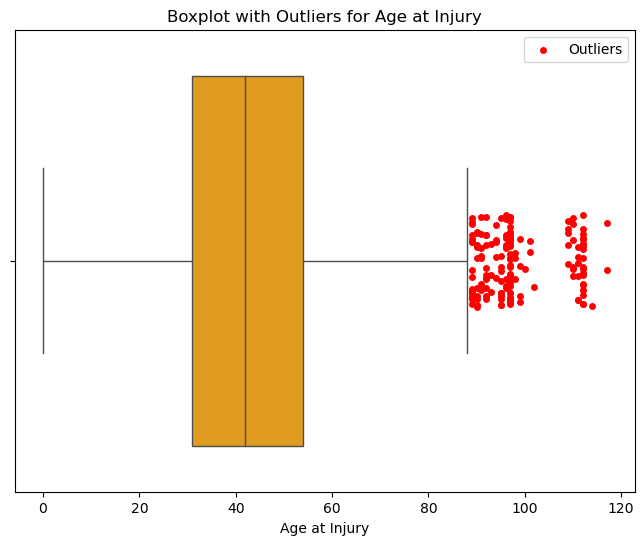

Column: Average Weekly Wage - Number of Outliers: 18809
Column: Average Weekly Wage - % of Outliers: 4.10% 



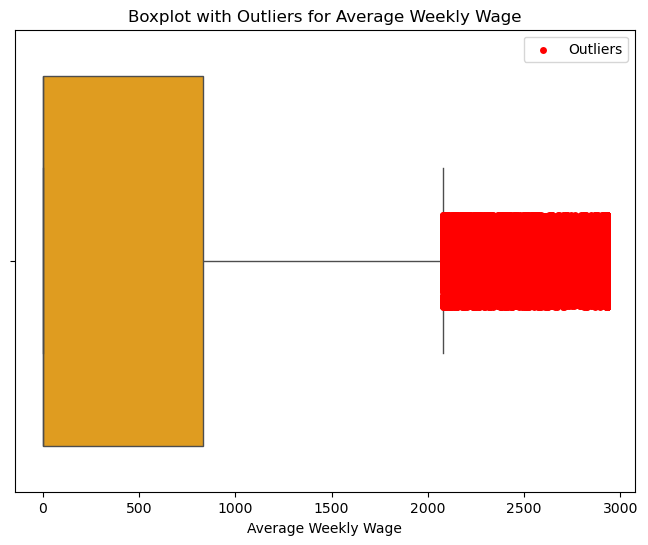

Column: Birth Year - Number of Outliers: 0
Column: Birth Year - % of Outliers: 0.00% 



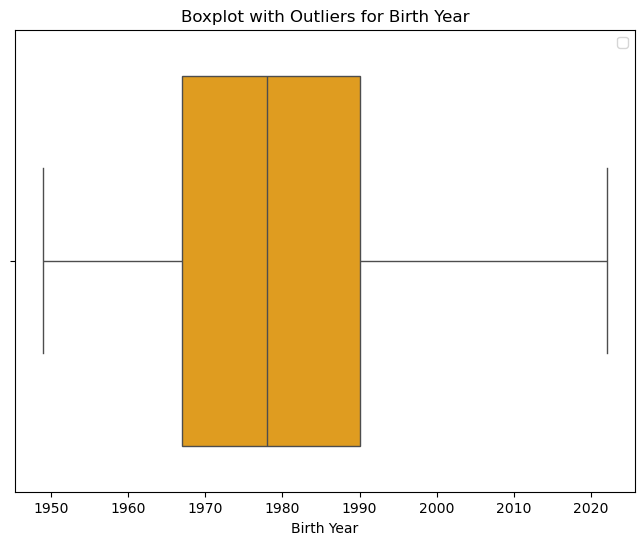

Column: IME-4 Count - Number of Outliers: 106210
Column: IME-4 Count - % of Outliers: 23.13% 



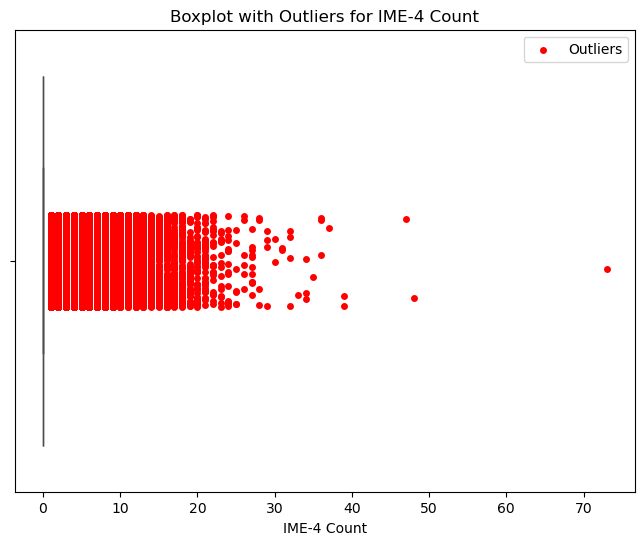

Column: Industry Code - Number of Outliers: 83608
Column: Industry Code - % of Outliers: 18.21% 



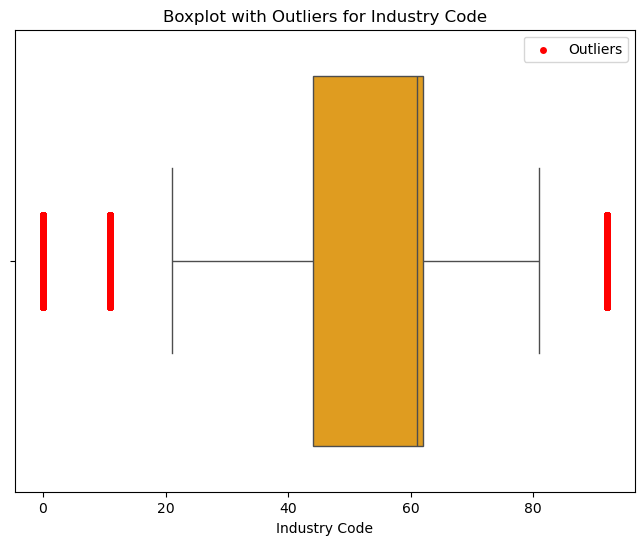

Column: WCIO Cause of Injury Code - Number of Outliers: 0
Column: WCIO Cause of Injury Code - % of Outliers: 0.00% 



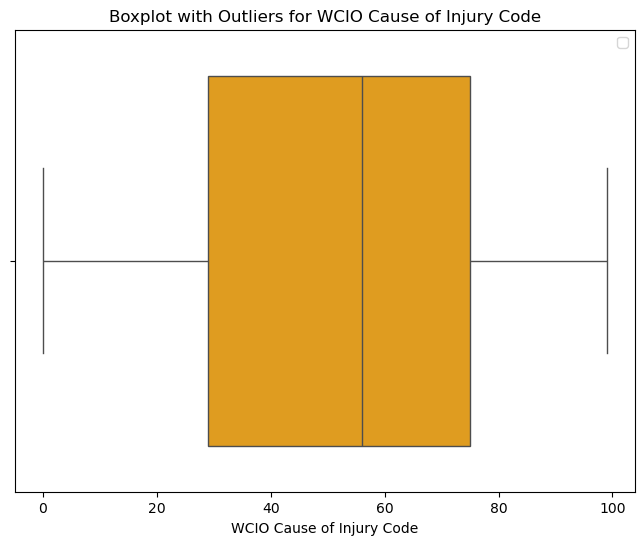

Column: WCIO Nature of Injury Code - Number of Outliers: 0
Column: WCIO Nature of Injury Code - % of Outliers: 0.00% 



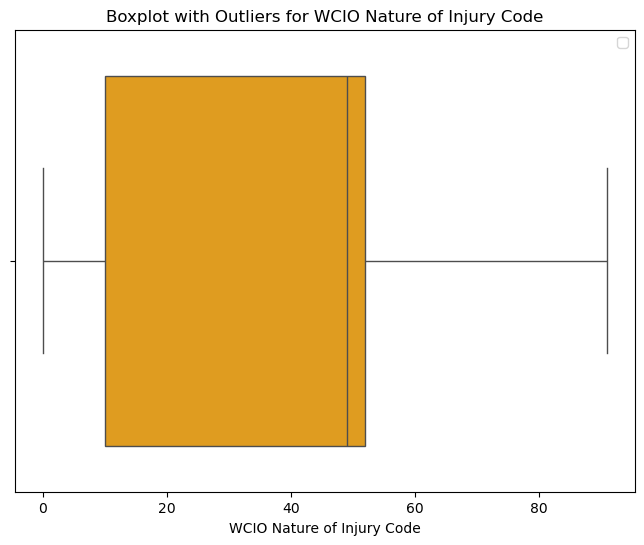

Column: WCIO Part Of Body Code - Number of Outliers: 41536
Column: WCIO Part Of Body Code - % of Outliers: 9.04% 



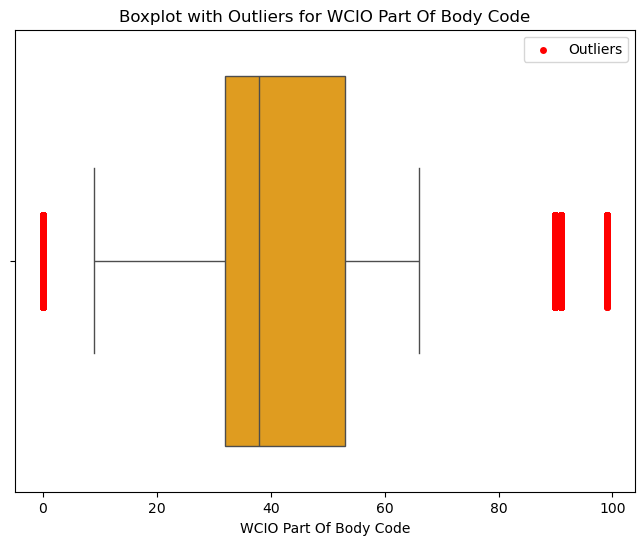

Column: Number of Dependents - Number of Outliers: 0
Column: Number of Dependents - % of Outliers: 0.00% 



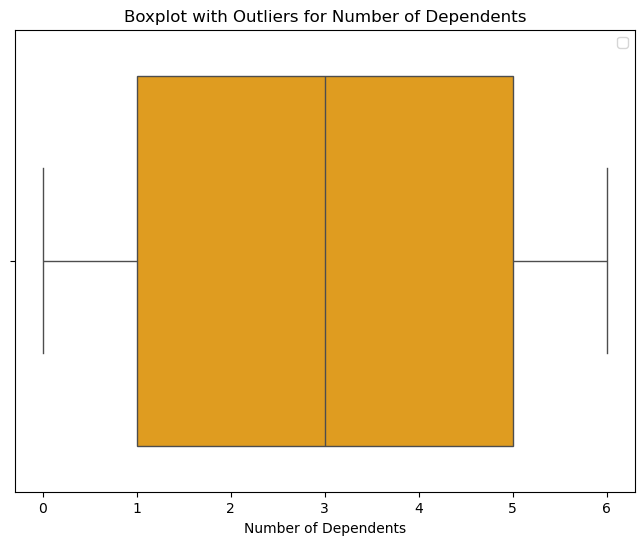

Column: Alternative Dispute Resolution Bin - Number of Outliers: 2073
Column: Alternative Dispute Resolution Bin - % of Outliers: 0.45% 



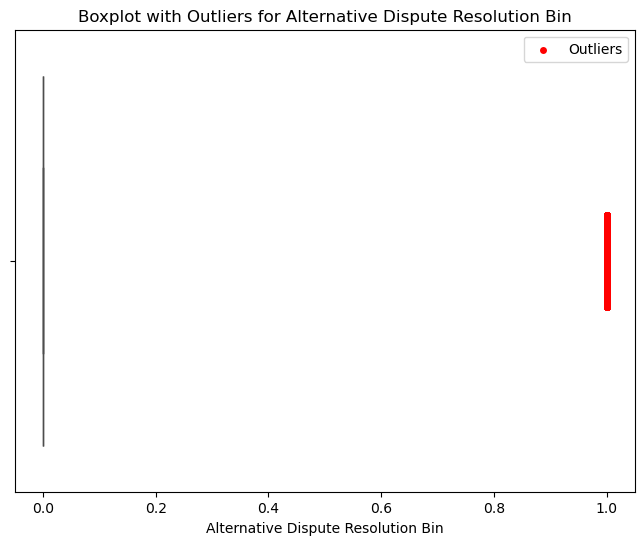

Column: Attorney/Representative Bin - Number of Outliers: 0
Column: Attorney/Representative Bin - % of Outliers: 0.00% 



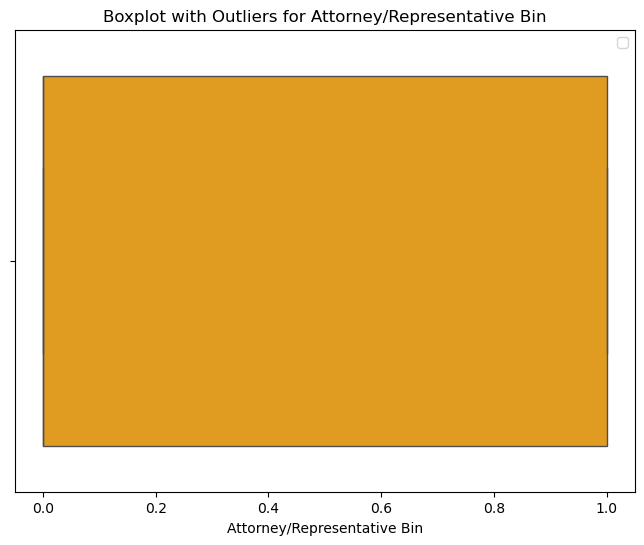

Column: Carrier Name Enc - Number of Outliers: 0
Column: Carrier Name Enc - % of Outliers: 0.00% 



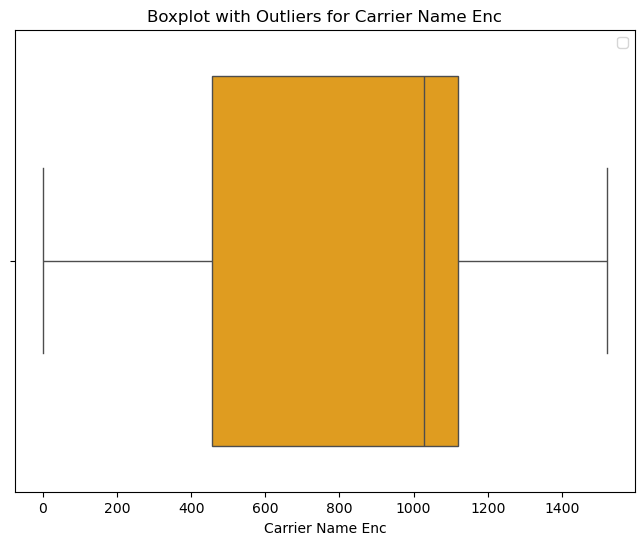

Column: Carrier Type freq - Number of Outliers: 0
Column: Carrier Type freq - % of Outliers: 0.00% 



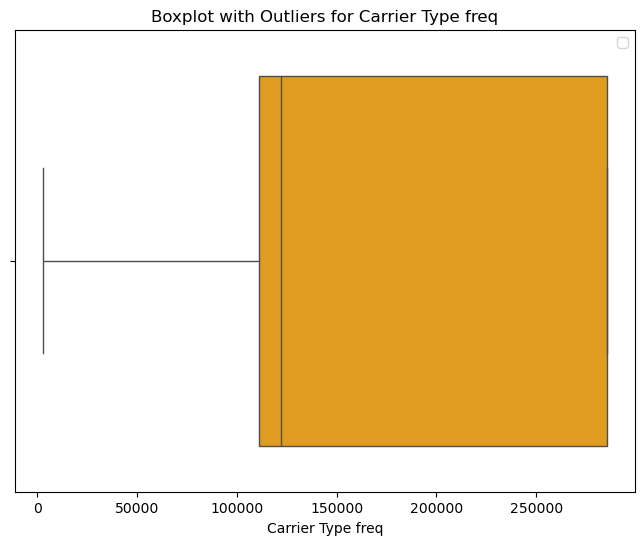

Column: Carrier Type_1A. PRIVATE - Number of Outliers: 0
Column: Carrier Type_1A. PRIVATE - % of Outliers: 0.00% 



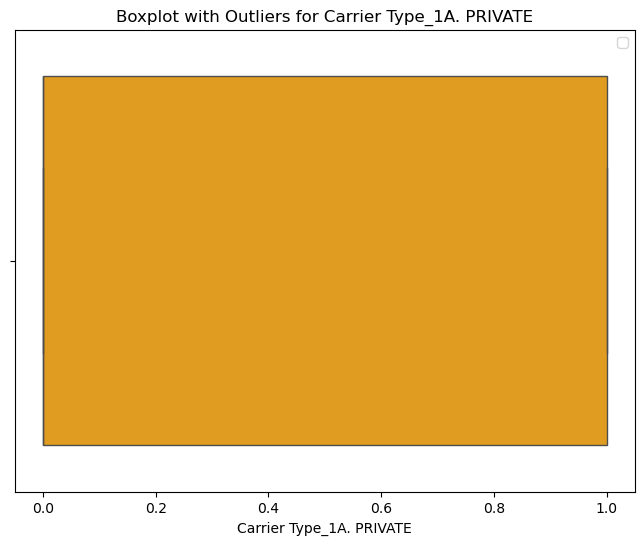

Column: Carrier Type_2A. SIF - Number of Outliers: 88880
Column: Carrier Type_2A. SIF - % of Outliers: 19.35% 



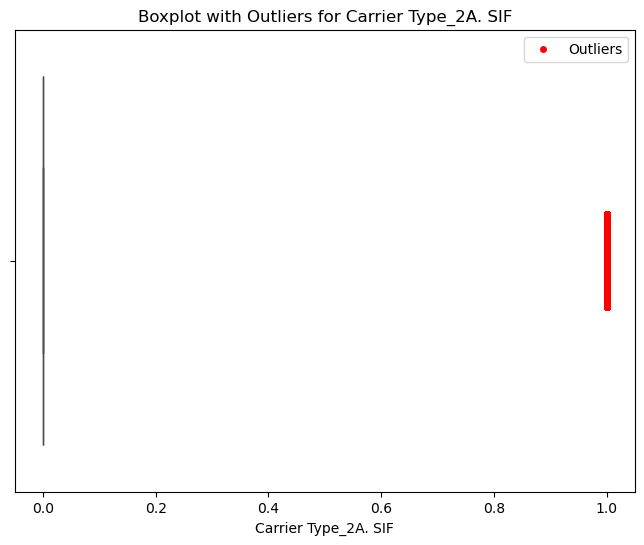

Column: Carrier Type_3A. SELF PUBLIC - Number of Outliers: 97437
Column: Carrier Type_3A. SELF PUBLIC - % of Outliers: 21.22% 



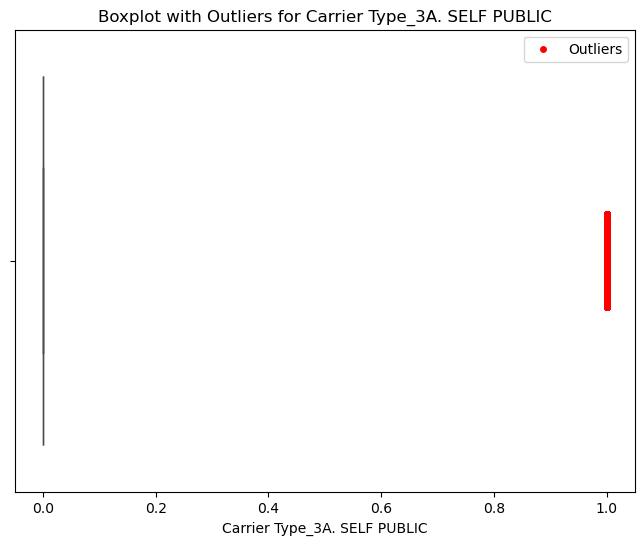

Column: Carrier Type_4A. SELF PRIVATE - Number of Outliers: 42176
Column: Carrier Type_4A. SELF PRIVATE - % of Outliers: 9.18% 



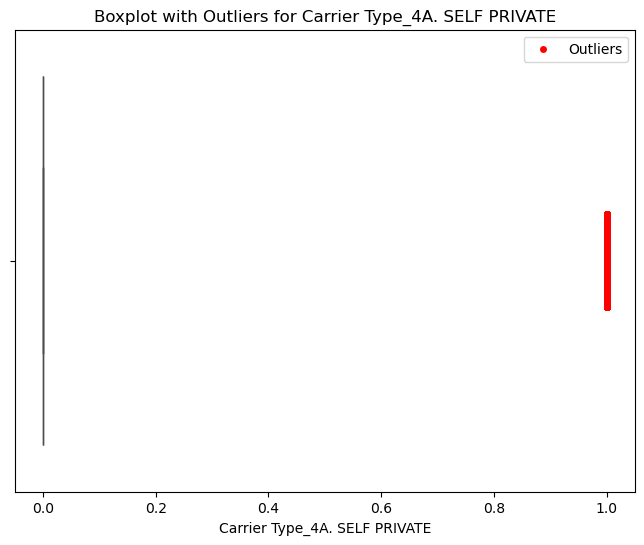

Column: County of Injury freq - Number of Outliers: 0
Column: County of Injury freq - % of Outliers: 0.00% 



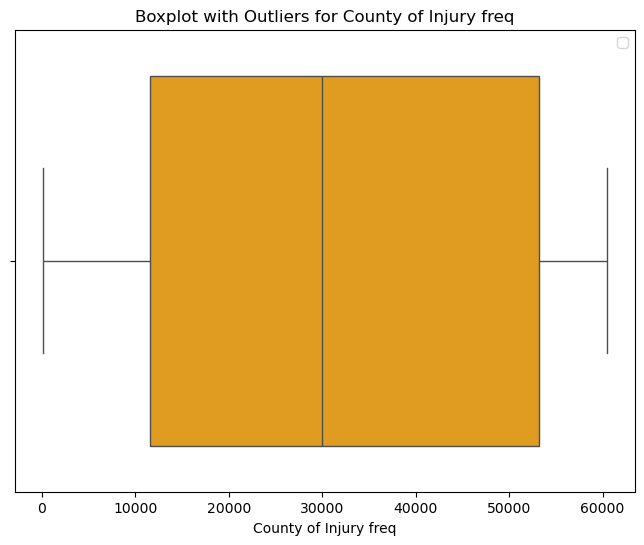

Column: COVID-19 Indicator Enc - Number of Outliers: 22096
Column: COVID-19 Indicator Enc - % of Outliers: 4.81% 



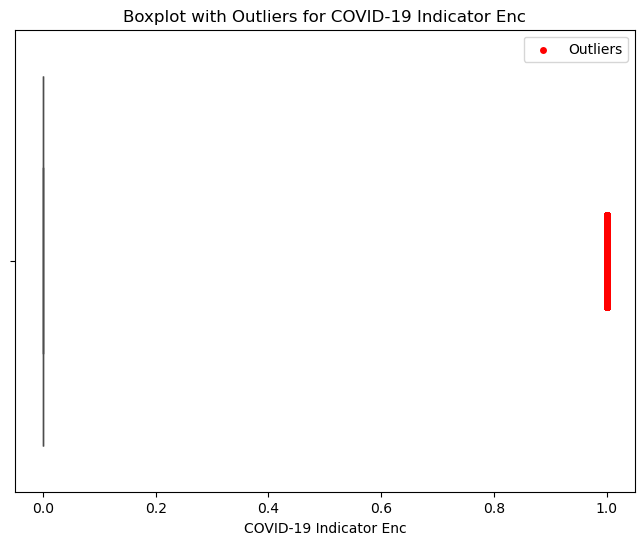

Column: District Name freq - Number of Outliers: 0
Column: District Name freq - % of Outliers: 0.00% 



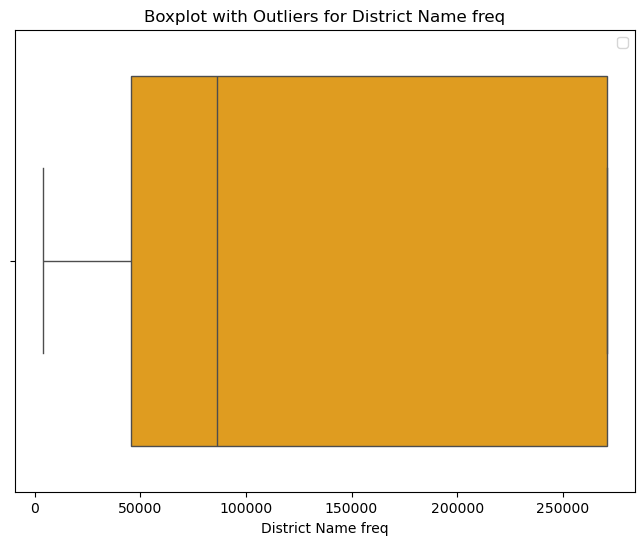

Column: Gender Enc - Number of Outliers: 0
Column: Gender Enc - % of Outliers: 0.00% 



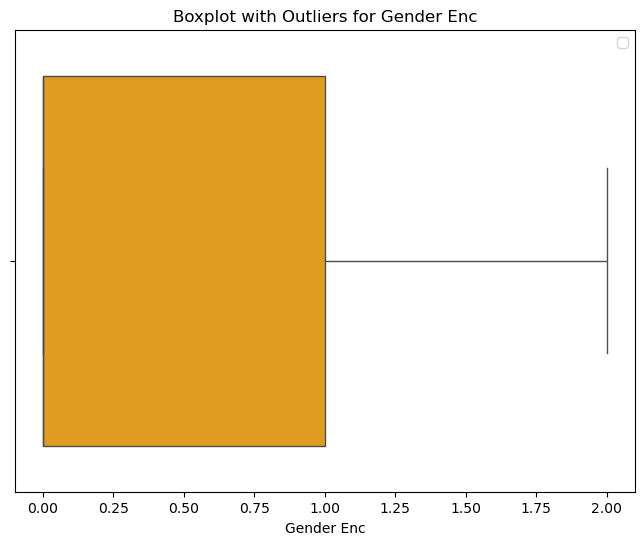

Column: Gender_F - Number of Outliers: 0
Column: Gender_F - % of Outliers: 0.00% 



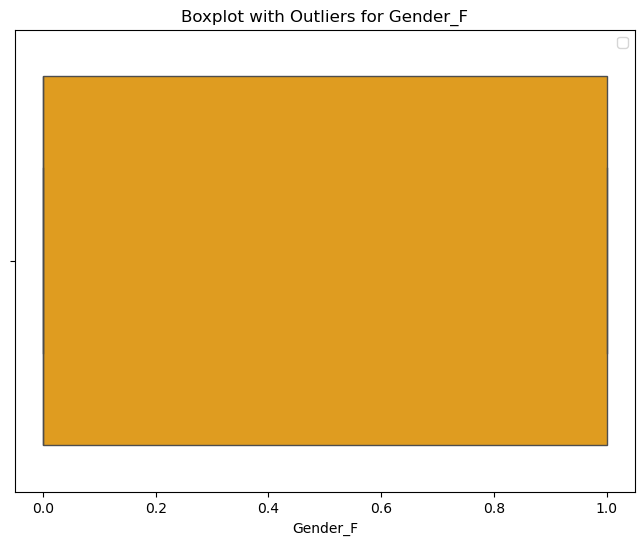

Column: Gender_M - Number of Outliers: 0
Column: Gender_M - % of Outliers: 0.00% 



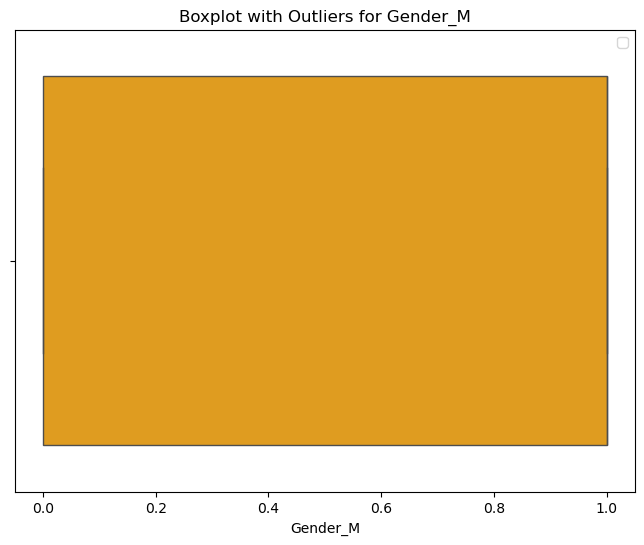

Column: Medical Fee Region freq - Number of Outliers: 0
Column: Medical Fee Region freq - % of Outliers: 0.00% 



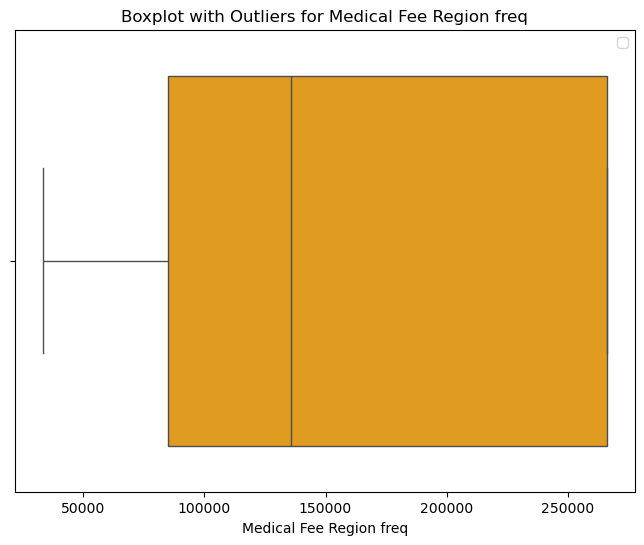

Column: Accident Date Year - Number of Outliers: 0
Column: Accident Date Year - % of Outliers: 0.00% 



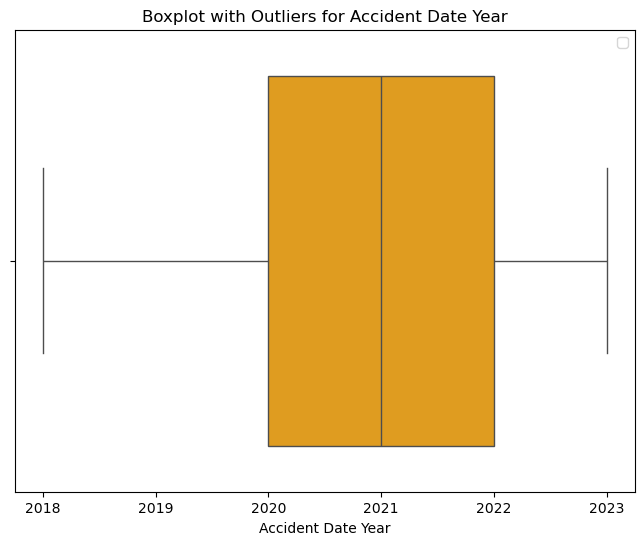

Column: Accident Date Month - Number of Outliers: 0
Column: Accident Date Month - % of Outliers: 0.00% 



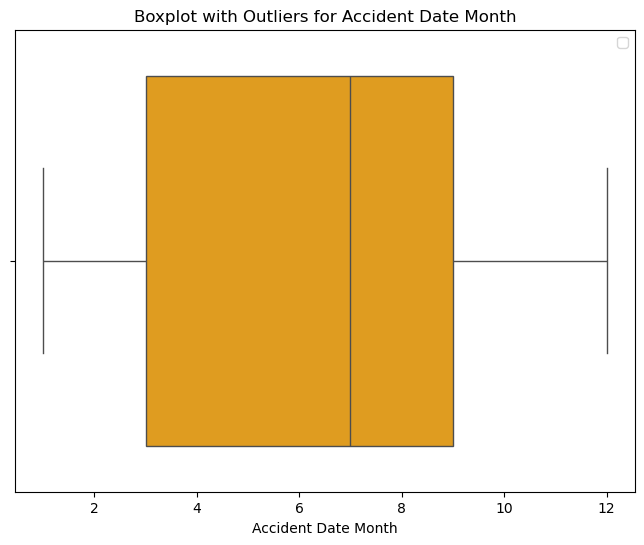

Column: Accident Date Day - Number of Outliers: 0
Column: Accident Date Day - % of Outliers: 0.00% 



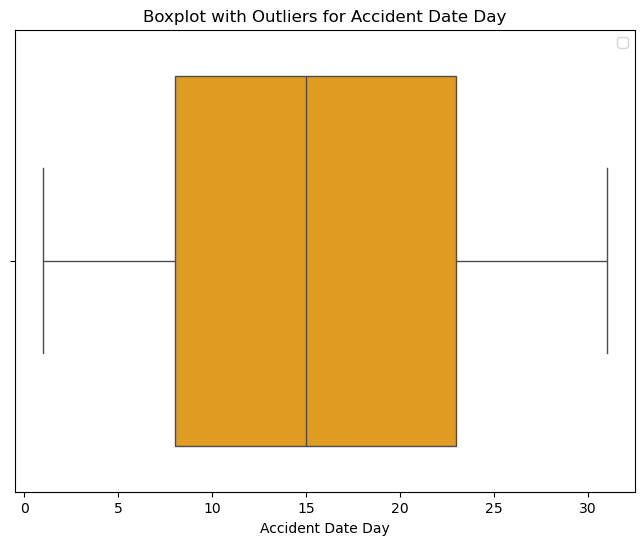

Column: Accident Date Day of Week - Number of Outliers: 0
Column: Accident Date Day of Week - % of Outliers: 0.00% 



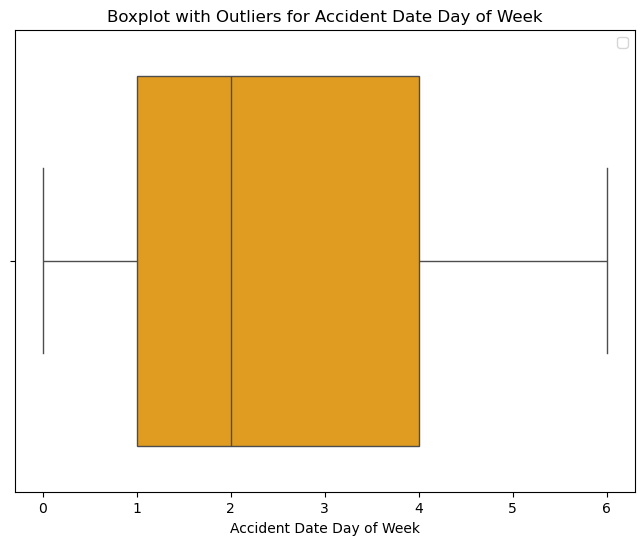

Column: Assembly Date Year - Number of Outliers: 0
Column: Assembly Date Year - % of Outliers: 0.00% 



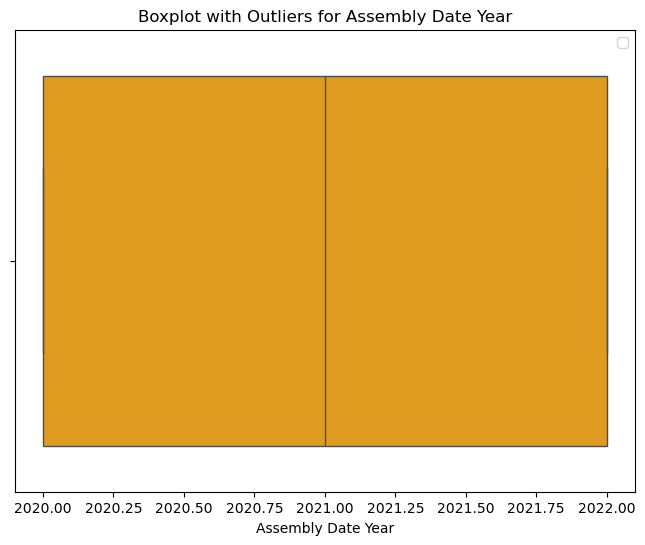

Column: Assembly Date Month - Number of Outliers: 0
Column: Assembly Date Month - % of Outliers: 0.00% 



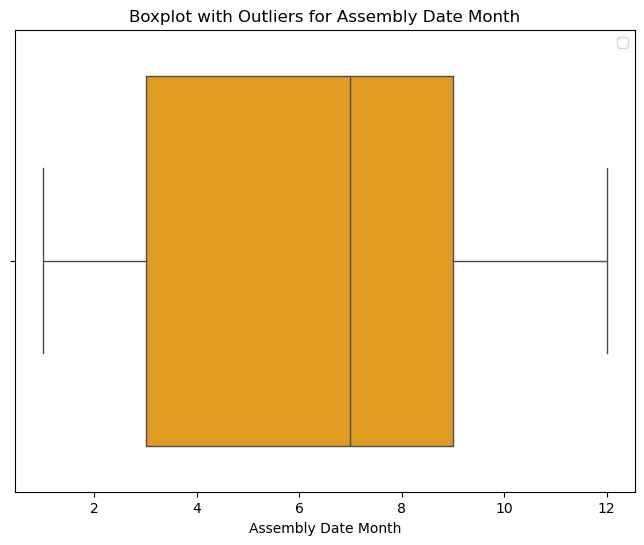

Column: Assembly Date Day - Number of Outliers: 0
Column: Assembly Date Day - % of Outliers: 0.00% 



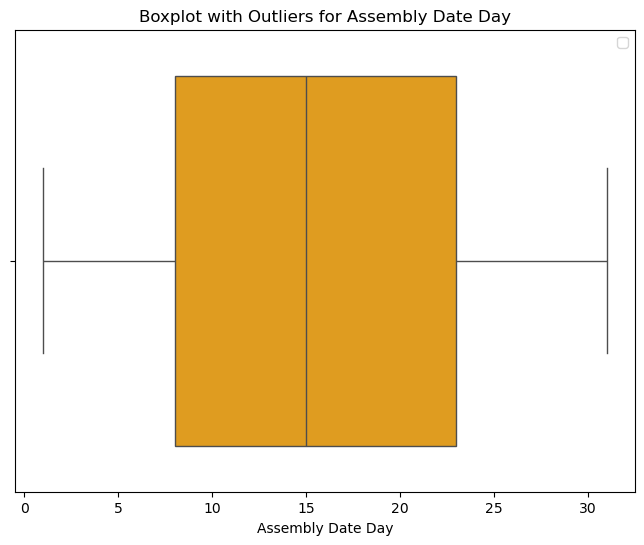

Column: Assembly Date Day of Week - Number of Outliers: 0
Column: Assembly Date Day of Week - % of Outliers: 0.00% 



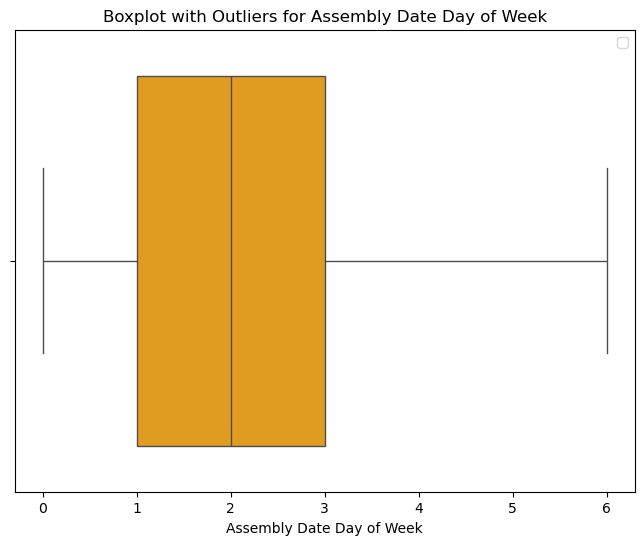

Column: C-2 Date Year - Number of Outliers: 0
Column: C-2 Date Year - % of Outliers: 0.00% 



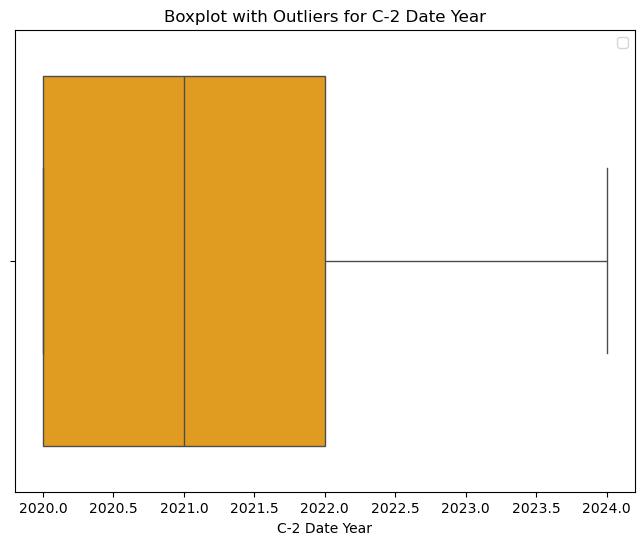

Column: C-2 Date Month - Number of Outliers: 0
Column: C-2 Date Month - % of Outliers: 0.00% 



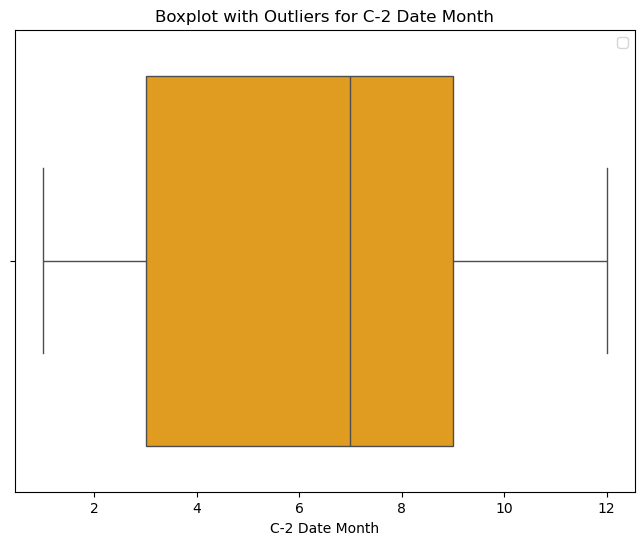

Column: C-2 Date Day - Number of Outliers: 0
Column: C-2 Date Day - % of Outliers: 0.00% 



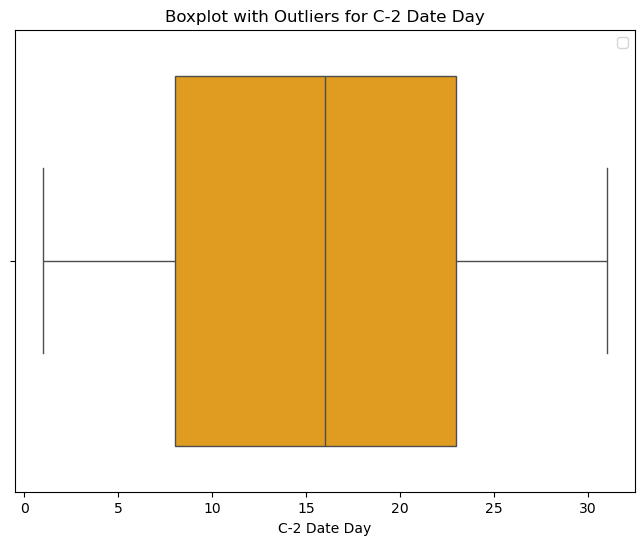

Column: C-2 Date Day of Week - Number of Outliers: 0
Column: C-2 Date Day of Week - % of Outliers: 0.00% 



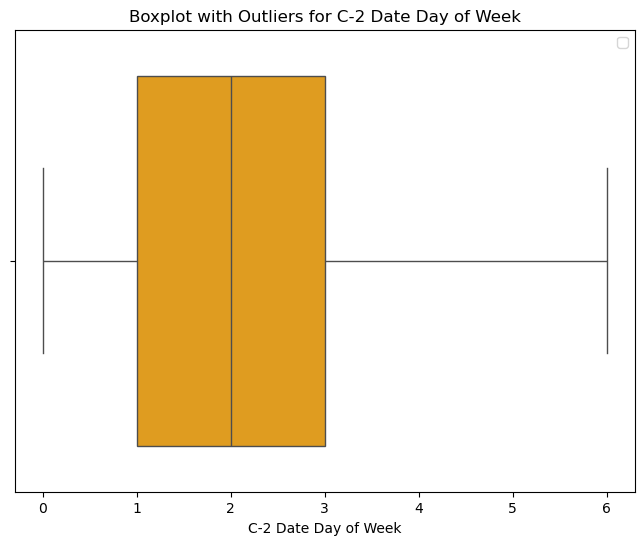

Column: WCIO Codes - Number of Outliers: 0
Column: WCIO Codes - % of Outliers: 0.00% 



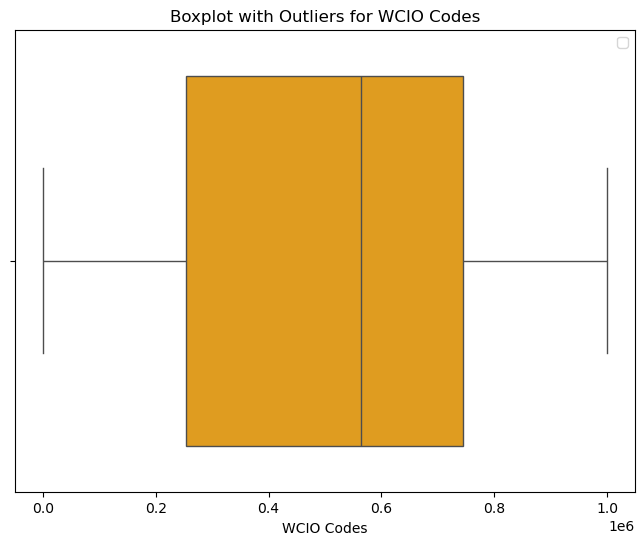

Column: Insurance - Number of Outliers: 0
Column: Insurance - % of Outliers: 0.00% 



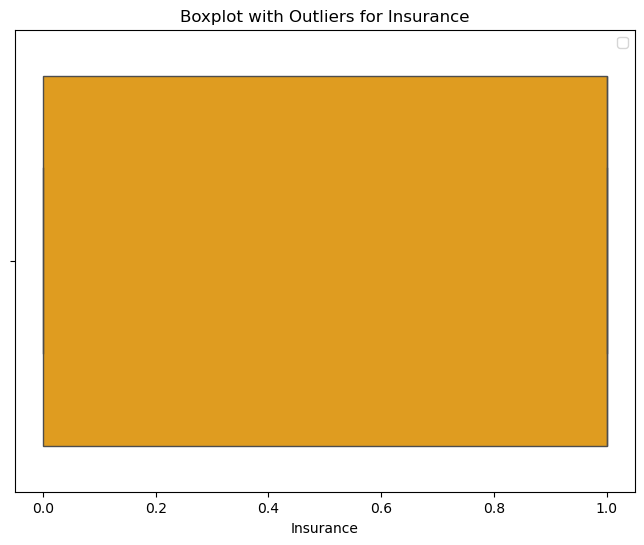

Column: Zip Code Valid - Number of Outliers: 35126
Column: Zip Code Valid - % of Outliers: 7.65% 



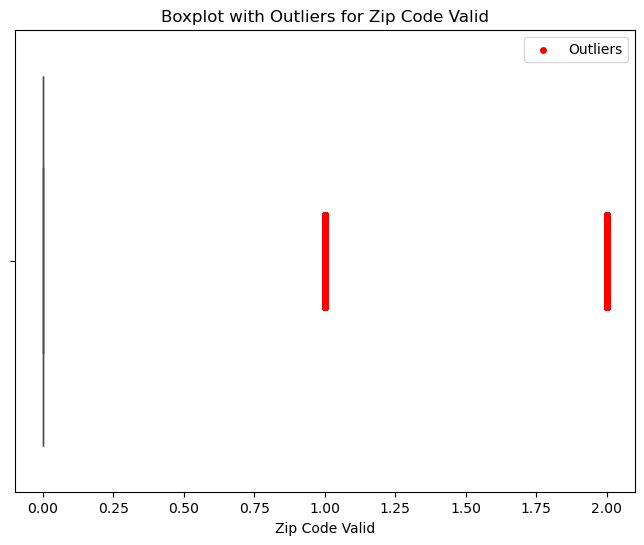

Column: Industry Sector Count Enc - Number of Outliers: 0
Column: Industry Sector Count Enc - % of Outliers: 0.00% 



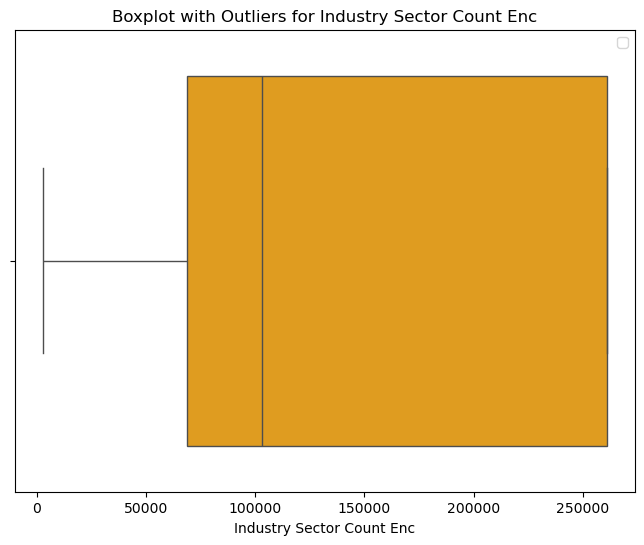

Column: Age Group - Number of Outliers: 26124
Column: Age Group - % of Outliers: 5.69% 



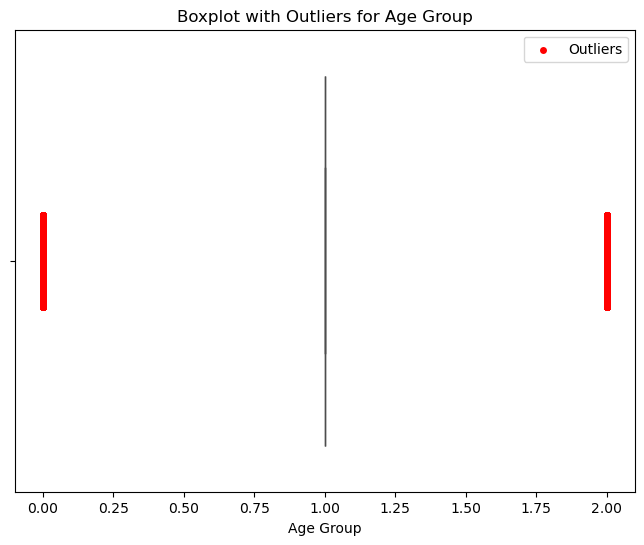

Column: C-3 Date Binary - Number of Outliers: 0
Column: C-3 Date Binary - % of Outliers: 0.00% 



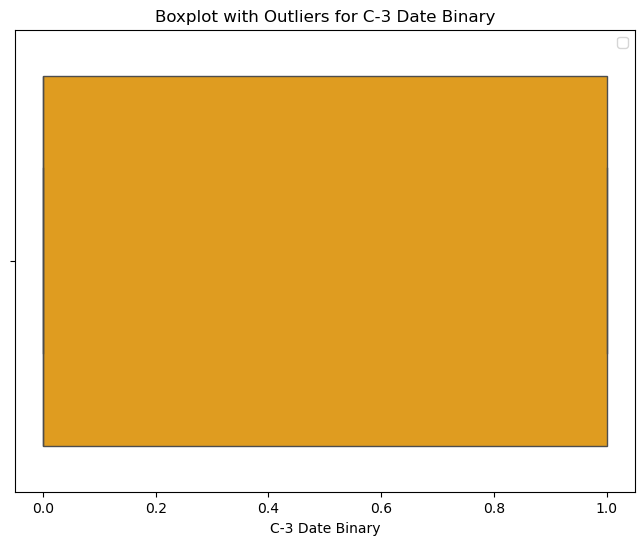

Column: First Hearing Date Binary - Number of Outliers: 0
Column: First Hearing Date Binary - % of Outliers: 0.00% 



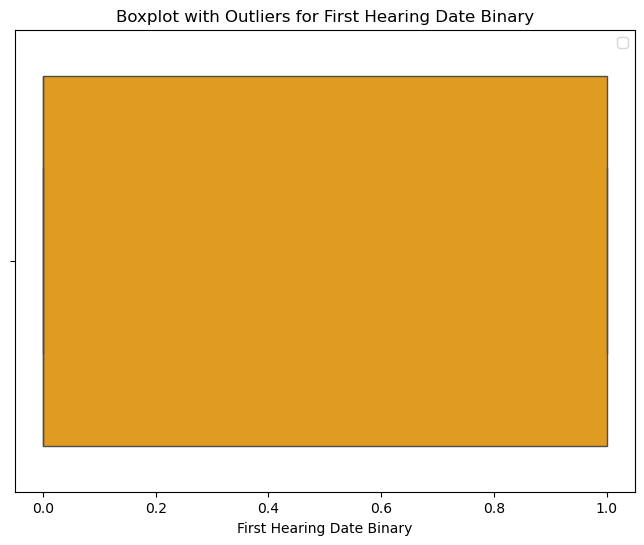

Column: IME-4 Count Log - Number of Outliers: 106210
Column: IME-4 Count Log - % of Outliers: 23.13% 



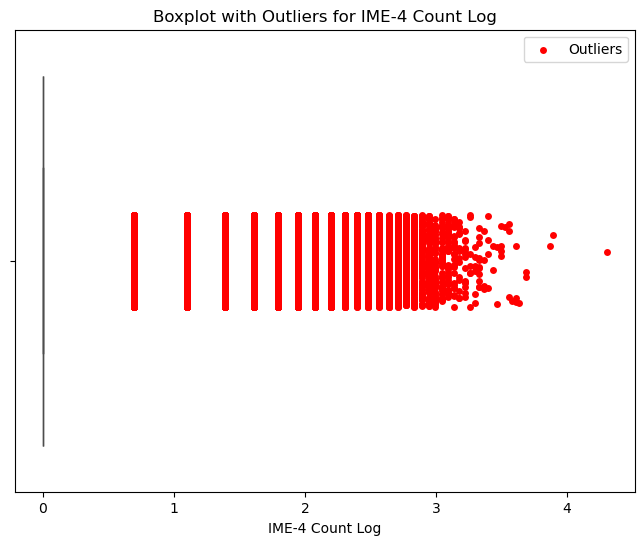

Column: IME-4 Count Double Log - Number of Outliers: 106210
Column: IME-4 Count Double Log - % of Outliers: 23.13% 



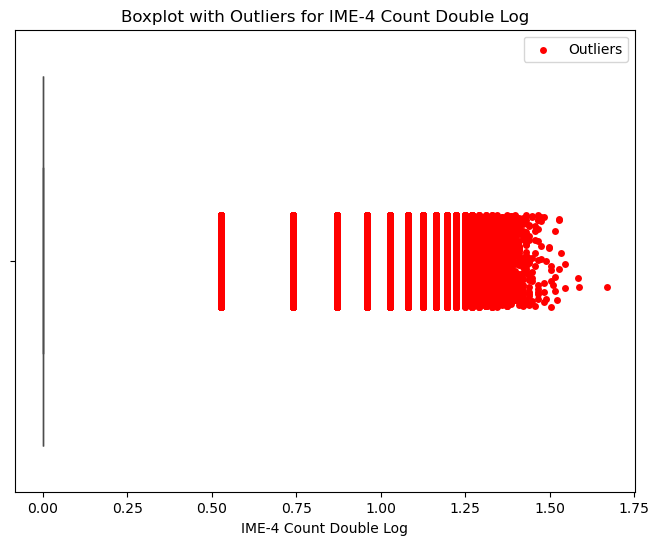

Columns with more than 0.0001% Outliers:
['Age at Injury', 'Average Weekly Wage', 'IME-4 Count', 'Industry Code', 'WCIO Part Of Body Code', 'Alternative Dispute Resolution Bin', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'COVID-19 Indicator Enc', 'Zip Code Valid', 'Age Group', 'IME-4 Count Log', 'IME-4 Count Double Log']


{'Age at Injury': {'lower_bound': np.float64(-3.5),
  'upper_bound': np.float64(88.5)},
 'Average Weekly Wage': {'lower_bound': np.float64(-1245.705),
  'upper_bound': np.float64(2076.175)},
 'Birth Year': {'lower_bound': np.float64(1932.5),
  'upper_bound': np.float64(2024.5)},
 'IME-4 Count': {'lower_bound': np.float64(0.0),
  'upper_bound': np.float64(0.0)},
 'Industry Code': {'lower_bound': np.float64(17.0),
  'upper_bound': np.float64(89.0)},
 'WCIO Cause of Injury Code': {'lower_bound': np.float64(-40.0),
  'upper_bound': np.float64(144.0)},
 'WCIO Nature of Injury Code': {'lower_bound': np.float64(-53.0),
  'upper_bound': np.float64(115.0)},
 'WCIO Part Of Body Code': {'lower_bound': np.float64(0.5),
  'upper_bound': np.float64(84.5)},
 'Number of Dependents': {'lower_bound': np.float64(-5.0),
  'upper_bound': np.float64(11.0)},
 'Alternative Dispute Resolution Bin': {'lower_bound': np.float64(0.0),
  'upper_bound': np.float64(0.0)},
 'Attorney/Representative Bin': {'lower_bound

In [32]:
p.detect_outliers_iqr(X_train, 0.0001)

### Dealing With Outliers

Here we will apply some techniques to attempt to deal with outliers, either by applying some transformations or removing them. Our goal is to not remove more than 5% of observations. To keep track of this metrics, we will start by saving the initial length of the dataset.

In [23]:
X_train_copy = X_train.copy()
X_train_len = len(X_train_copy)

**Average Weekly Wage**

Winsorization for `Average Weekly Wage`

In [27]:
upper_limit = X_train['Average Weekly Wage'].quantile(0.99)
lower_limit = X_train['Average Weekly Wage'].quantile(0.01)


X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].clip(lower = lower_limit
                                                                  , upper=upper_limit)

Apply a square root transformation

In [41]:
X_train['Average Weekly Wage Sqrt'] = np.sqrt(X_train['Average Weekly Wage'])

X_val['Average Weekly Wage Sqrt'] = np.sqrt(X_val['Average Weekly Wage'])

test['Average Weekly Wage Sqrt'] = np.sqrt(test['Average Weekly Wage'])

**Birth Year**

In [28]:
lower_limit = X_train['Birth Year'].quantile(0.01)

X_train['Birth Year'] = X_train['Birth Year'].clip(lower = lower_limit)

**IME-4 Count**

In [29]:
X_train['IME-4 Count Log'] = np.log1p(X_train['IME-4 Count'])
X_train['IME-4 Count Double Log'] = np.log1p(X_train['IME-4 Count Log'])

X_val['IME-4 Count Log'] = np.log1p(X_val['IME-4 Count'])
X_val['IME-4 Count Double Log'] = np.log1p(X_val['IME-4 Count Log'])

test['IME-4 Count Log'] = np.log1p(test['IME-4 Count'])
test['IME-4 Count Double Log'] = np.log1p(test['IME-4 Count Log'])

**Accident Date Year**

In [30]:
lower_limit = X_train['Accident Date Year'].quantile(0.01)

X_train['Accident Date Year'] = X_train['Accident Date Year'].clip(lower = lower_limit)

**C-2 Date Year**

In [31]:
lower_limit = X_train['C-2 Date Year'].quantile(0.01)

X_train['C-2 Date Year'] = X_train['C-2 Date Year'].clip(lower = lower_limit)

## 2.4 Scaling

Ensure y_train has the same indices as X_train

In [34]:
y_train = y_train[X_train.index]

**Variable type split**

In [38]:
num = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents',
       'Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Assembly Date Year', 
       'Assembly Date Month', 'Assembly Date Day', 'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day',
       'IME-4 Count Log', 'IME-4 Count Double Log', 'Average Weekly Wage Sqrt']

max3_class = ['Attorney/Representative Bin', 'Carrier Type_1A. PRIVATE', 'Carrier Type_2A. SIF',
              'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'COVID-19 Indicator Enc',
              'Gender Enc', 'Gender_F', 'Gender_M', 'Zip Code Valid', 'Age Group', 'C-3 Date Binary',
              'First Hearing Date Binary', 'Insurance']

categ = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
         'WCIO Part Of Body Code', 'Carrier Name Enc', 'Carrier Type freq', 'County of Injury freq',
         'District Name freq', 'Medical Fee Region freq', 'Accident Date Day of Week', 'Assembly Date Day of Week',
         'C-2 Date Day of Week', 'WCIO Codes', 'Industry Sector Count Enc']

In [39]:
X_train_all_categ = pd.concat([X_train[categ], X_train[max3_class]], axis=1)
X_val_all_categ = pd.concat([X_val[categ], X_val[max3_class]], axis=1)

**Scaling**

In [ ]:
robust = RobustScaler()

In [ ]:
# Scaling the numerical features in the training set using RobustScaler
X_train_num_RS = robust.fit_transform(X_train[num])
X_train_num_RS = pd.DataFrame(X_train_num_RS, columns=num, index=X_train.index)

In [ ]:
# Scaling the numerical features in the validation set using the fitted RobustScaler
X_val_num_RS = robust.transform(X_val[num])
X_val_num_RS = pd.DataFrame(X_val_num_RS, columns=num, index=X_val.index)

# Scaling the numerical features in the test set using the same fitted RobustScaler
test_num_RS = robust.transform(test[num])
test_num_RS = pd.DataFrame(test_num_RS, columns=num, index=test.index)

** ** 

Having performed all data transformations, we will export the data to later use it in the Modelling section of this notebook. This will allow to save time by not always having to run computationally expensive methods such as RFE.

To go to the Modelling section click in the button.

[Go to Modeling &#129034;](#modeling)

<a class="anchor" id="feature-selection"></a>



In [111]:
# X_train.to_csv('./data/X_train_treated.csv')
# X_val.to_csv('./data/X_val_treated.csv')
# y_train.to_csv('./data/y_train_treated.csv')
# y_val.to_csv('./data/y_val_treated.csv')
# test.to_csv('./data/test_treated.csv')

** **

# 3. Feature Selection

<a href="#top">Top &#129033;</a>

In this section we will perform feature selection. We will start by splitting data into numeric, categorical or max 3 classes. Then, scaling will be applied. However, from the previous delivery we noted that the best performing models are Tree-Based, which are not sensitive to feature's scale, and therefore do not require scaling. Consequently, we will implement the same method for both scaled and unscaled numerical data, and compare the results.

## 3.1 Filter-Based Methods

<a href="#top">Top &#129033;</a>

Filter-based methods evaluate the relevance of features independently of the model using statistical measures like correlation, Chi-square tests, and mutual information. This section explores how these methods help reduce dimensionality, improve model performance, and prevent overfitting by selecting the most informative features.



**Variance Threshold**

In [42]:
X_train[num].var()

Age at Injury                  203.489043
Average Weekly Wage         490171.141909
Birth Year                     193.317772
IME-4 Count                      3.705451
Number of Dependents             4.001859
Accident Date Year               0.825751
Accident Date Month             11.937259
Accident Date Day               76.710138
Assembly Date Year               0.656852
Assembly Date Month             11.855025
Assembly Date Day                 76.2567
C-2 Date Year                    0.646896
C-2 Date Month                  11.581748
C-2 Date Day                    73.944253
IME-4 Count Log                  0.355709
IME-4 Count Double Log           0.124544
Average Weekly Wage Sqrt       290.485322
dtype: Float64

**Spearman Correlation Matrix**

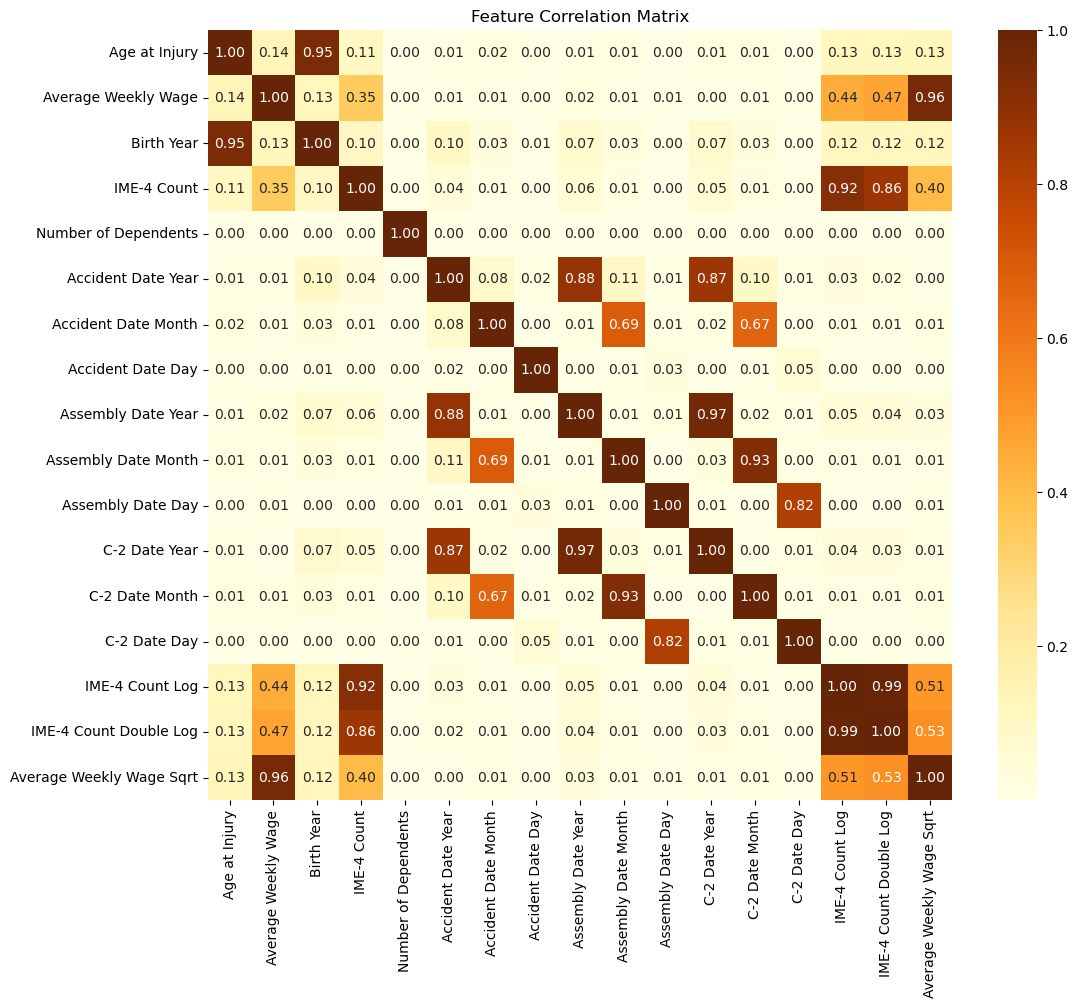

In [44]:
# Visualize the correlation matrix to identify relationships between numerical features
fs.correlation_matrix(X_train[num])

**Chi Squared Test**

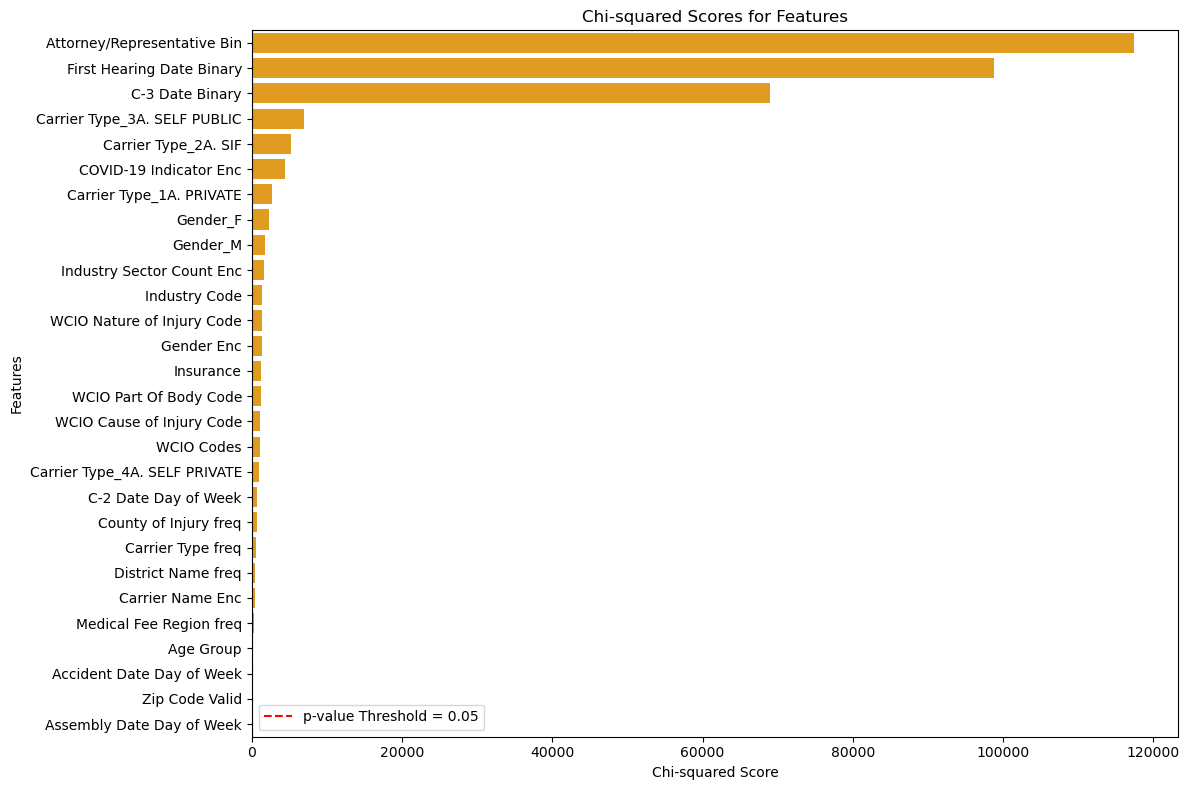


Initial Features: 28

['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Carrier Name Enc', 'Carrier Type freq', 'County of Injury freq', 'District Name freq', 'Medical Fee Region freq', 'Accident Date Day of Week', 'Assembly Date Day of Week', 'C-2 Date Day of Week', 'WCIO Codes', 'Industry Sector Count Enc', 'Attorney/Representative Bin', 'Carrier Type_1A. PRIVATE', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'COVID-19 Indicator Enc', 'Gender Enc', 'Gender_F', 'Gender_M', 'Zip Code Valid', 'Age Group', 'C-3 Date Binary', 'First Hearing Date Binary', 'Insurance']

Decision for Categorical Features (p-value < threshold): 25

['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Carrier Name Enc', 'Carrier Type freq', 'County of Injury freq', 'District Name freq', 'Medical Fee Region freq', 'C-2 Date Day of Week', 'WCIO Codes', 'Industry Se

In [45]:
fs.chi_squared(X_train_all_categ, y_train)

**Mutual Information Test**

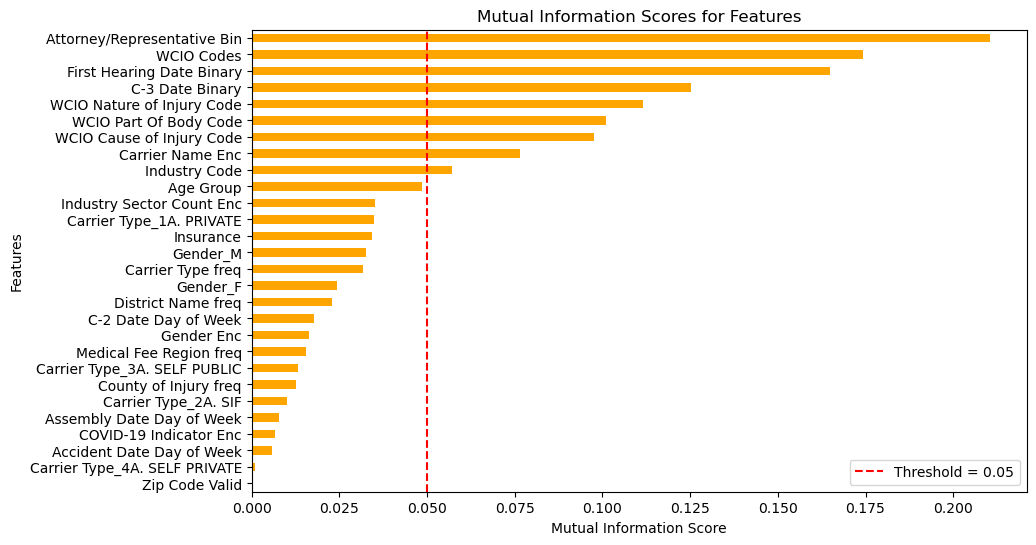


Initial Features: 28 

['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Carrier Name Enc', 'Carrier Type freq', 'County of Injury freq', 'District Name freq', 'Medical Fee Region freq', 'Accident Date Day of Week', 'Assembly Date Day of Week', 'C-2 Date Day of Week', 'WCIO Codes', 'Industry Sector Count Enc', 'Attorney/Representative Bin', 'Carrier Type_1A. PRIVATE', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'COVID-19 Indicator Enc', 'Gender Enc', 'Gender_F', 'Gender_M', 'Zip Code Valid', 'Age Group', 'C-3 Date Binary', 'First Hearing Date Binary', 'Insurance']

Decision for Categorical Features (MI Score >= 0.05): 9 

['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Carrier Name Enc', 'WCIO Codes', 'Attorney/Representative Bin', 'C-3 Date Binary', 'First Hearing Date Binary']


In [64]:
fs.mutual_info(X_train_all_categ, y_train, threshold = 0.05)

## 3.2 Wrapper Methods

<a href="#top">Top &#129033;</a>

Unlike filter methods, which assess features independently, wrapper methods evaluate the effectiveness of feature subsets by measuring the model’s performance, making them more computationally expensive but often more accurate in selecting relevant features.

**Recursive Feature Elimination (RFE) - Logistic Regression**

In [46]:
# Perform Recursive Feature Elimination (RFE) to select the top features based on their importance for a logistic regression model
n_features = np.arange(2, len(X_train[num].columns) + 1)
model = LogisticRegression()
fs.rfe(X_train[num], y_train, n_features = n_features, model = model)

# ~20 min

Classification Report for 2 features:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9981
           1       0.82      0.97      0.88    232862
           2       0.12      0.00      0.00     55125
           3       0.61      0.90      0.72    118806
           4       0.00      0.00      0.00     38624
           5       0.02      0.03      0.02      3369
           6       0.00      0.00      0.00        77
           7       0.00      0.00      0.00       376

    accuracy                           0.72    459220
   macro avg       0.19      0.24      0.20    459220
weighted avg       0.59      0.72      0.64    459220

Macro Avg F1 Score for 2 features: 0.2042

Classification Report for 3 features:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9981
           1       0.79      0.97      0.88    232862
           2       0.00      0.00      0.00     55125
           

Classification Report for 14 features:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9981
           1       0.79      0.98      0.87    232862
           2       0.00      0.00      0.00     55125
           3       0.61      0.85      0.71    118806
           4       0.29      0.04      0.07     38624
           5       0.00      0.00      0.00      3369
           6       0.00      0.00      0.00        77
           7       0.00      0.00      0.00       376

    accuracy                           0.72    459220
   macro avg       0.21      0.23      0.21    459220
weighted avg       0.58      0.72      0.63    459220

Macro Avg F1 Score for 14 features: 0.2061

Classification Report for 15 features:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9981
           1       0.79      0.98      0.87    232862
           2       0.00      0.00      0.00     55125
        

['Average Weekly Wage', 'Birth Year', 'Average Weekly Wage Sqrt']

Selected Features:

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Accident Date Year',
 'Assembly Date Year',
 'C-2 Date Year',
 'IME-4 Count Log']

**Recursive Feature Elimination (RFE) - Random Forest Classifier**

In [ ]:
# Perform Recursive Feature Elimination (RFE) to select the top features based on their importance for a logistic regression model
n_features = np.arange(2, len(X_train[num].columns) + 1)
model = RandomForestClassifier()
fs.rfe(X_train[num], y_train, n_features = n_features, model = model)

# 

Selected Features:

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents',
 'Accident Date Year',
 'Accident Date Month',
 'Accident Date Day',
 'Assembly Date Year',
 'Assembly Date Month',
 'Assembly Date Day',
 'C-2 Date Year',
 'C-2 Date Month',
 'C-2 Date Day',
 'IME-4 Count Log',
 'IME-4 Count Double Log']

## 3.3 Embedded Methods

<a href="#top">Top &#129033;</a>

These methods use algorithms that inherently select features as part of the model’s learning process. Embedded methods are computationally efficient and tend to be more accurate than filter methods, as they consider feature interactions and model performance simultaneously.


**Least Absolute Shrinkage and Selection Operator (LASSO)**

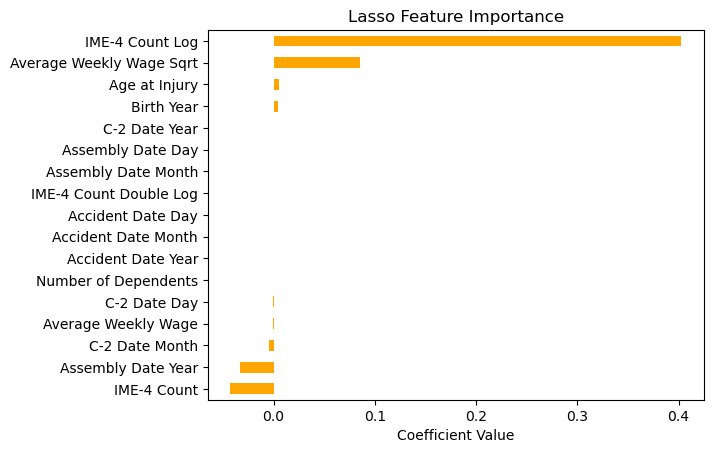


Initial Features: 17

['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Assembly Date Year', 'Assembly Date Month', 'Assembly Date Day', 'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'IME-4 Count Log', 'IME-4 Count Double Log', 'Average Weekly Wage Sqrt']

Decision for Numerical Features (lasso ≠ 0): 9

['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Assembly Date Year', 'C-2 Date Month', 'C-2 Date Day', 'IME-4 Count Log', 'Average Weekly Wage Sqrt']


In [65]:
fs.lasso(X_train[num], y_train, alpha = 0.01)

**Extra Trees Classifier**

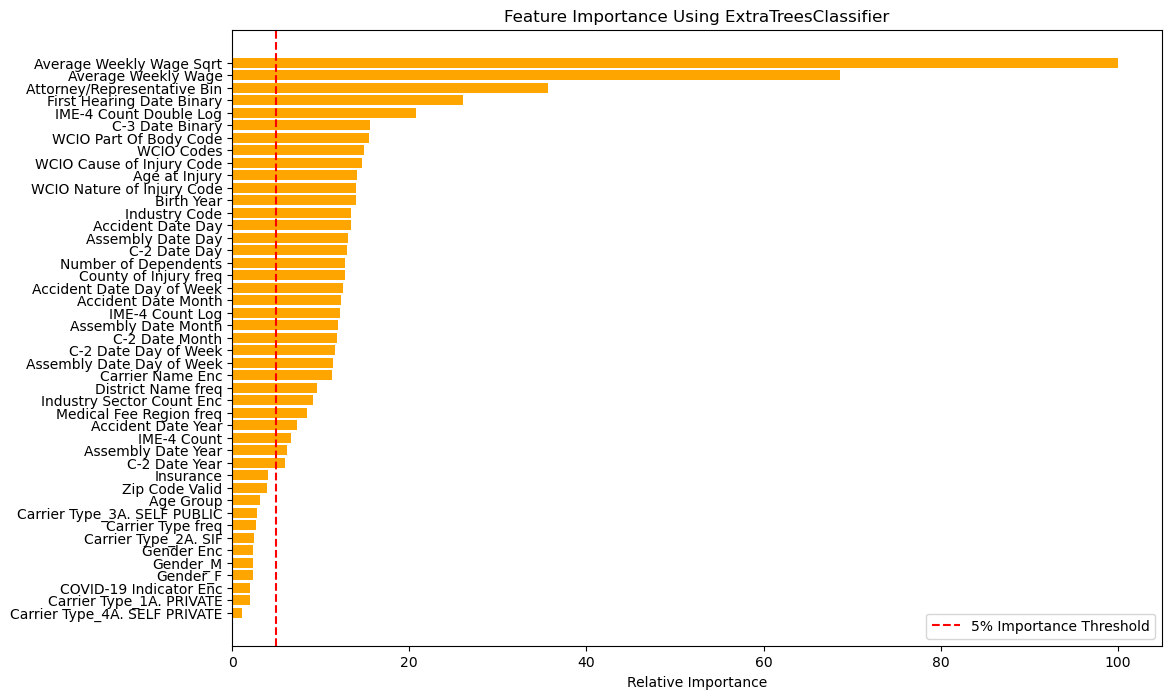


Initial Features: 45

['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Assembly Date Year', 'Assembly Date Month', 'Assembly Date Day', 'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'IME-4 Count Log', 'IME-4 Count Double Log', 'Average Weekly Wage Sqrt', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Carrier Name Enc', 'Carrier Type freq', 'County of Injury freq', 'District Name freq', 'Medical Fee Region freq', 'Accident Date Day of Week', 'Assembly Date Day of Week', 'C-2 Date Day of Week', 'WCIO Codes', 'Industry Sector Count Enc', 'Attorney/Representative Bin', 'Carrier Type_1A. PRIVATE', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'COVID-19 Indicator Enc', 'Gender Enc', 'Gender_F', 'Gender_M', 'Zip Code Valid', 'Age Group', 'C-3 Date Binary', 'First Hearing Date Bin

In [66]:
fs.plot_feature_importance(X_train[num], X_train_all_categ, y_train, 
                        n_estimators = 250)

[Go to Modeling &#129034;](#modeling)

## 3.4 Final Features

<a href="#top">Top &#129033;</a>

# 4. Modeling

<a class="anchor" id="modeling"></a>

[Go to Feature Selection &#129034;](#feature-selection)

<a href="#top">Top &#129033;</a>

Start by importing the correct datasets.


In [112]:
# X_train = pd.read_csv('./data/X_train_treated.csv', index_col = 'Claim Identifier')
# X_val = pd.read_csv('./data/X_val_treated.csv', index_col = 'Claim Identifier')
# y_train = pd.read_csv('./data/y_train_treated.csv', index_col = 'Claim Identifier')
# y_val = pd.read_csv('./data/y_val_treated.csv', index_col = 'Claim Identifier')
# test = pd.read_csv('./data/test_treated.csv', index_col = 'Claim Identifier')

And select the columns to use for predictions purposes

In [ ]:
columns = []

X_train_filtered = X_train[columns]
X_val_filtered = X_val[columns]
test_filtered = test[columns]